<a href="https://colab.research.google.com/github/FranItu/CODOJOTRACK1/blob/main/Week7/Wine_Francisco_Iturralde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine


## Import

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [10]:
headr = ['Type', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
         'Color intensity', 'Hue', 'OD280/315', 'Proline']

In [12]:
df = pd.read_csv('/content/drive/My Drive/Coding_Dojo/Bases_De_Datos/wine.csv', header = None)
df.columns = headr
df.head()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [14]:
df['Type'].unique()

array([1, 2, 3])

Text(0.5, 0, 'Malic Acid')

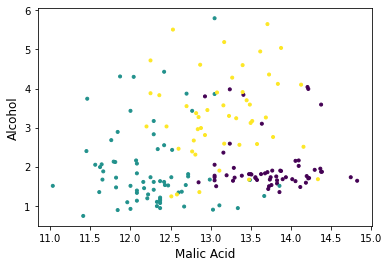

In [20]:
#Demo Plot
plt.scatter(df['Alcohol'], df['Malic acid'], c = df['Type'], marker= '.')
plt.ylabel('Alcohol', fontsize = 12)
plt.xlabel('Malic Acid', fontsize = 12)

## Logistic Reg

In [21]:
df.columns

Index(['Type', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/315', 'Proline'],
      dtype='object')

In [22]:
X = df[['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/315', 'Proline']]
y = df['Type']

In [33]:
logreg = LogisticRegression(C = 1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
logreg.fit(X_train,y_train)

LogisticRegression(C=1000)

In [35]:
logreg.intercept_

array([ 0.6591783 ,  0.4724083 , -1.13158661])

In [36]:
logreg.coef_

array([[ 2.69431857,  0.50748717,  1.19807703, -2.69309855,  0.20557035,
         0.35033212,  1.42649507, -0.78507534,  0.30320746,  1.16531347,
        -0.72892984,  2.36334275,  3.03527329],
       [-3.17359118, -1.24180995, -2.57353874,  1.14407318,  0.30238545,
         0.24444999,  1.26113716,  0.31289624, -0.5434307 , -4.27140838,
         2.41395757,  0.18184835, -3.68547657],
       [ 0.47927261,  0.73432278,  1.37546171,  1.54902537, -0.5079558 ,
        -0.59478211, -2.68763223,  0.4721791 ,  0.24022325,  3.10609491,
        -1.68502773, -2.5451911 ,  0.65020328]])

In [38]:
print('Training accuracy:', logreg.score(X_train, y_train))
print('Test accuracy:', logreg.score(X_test, y_test))

Training accuracy: 1.0
Test accuracy: 0.9777777777777777


## KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn = KNeighborsClassifier(n_neighbors=2)

In [41]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=2)

In [42]:
knn.score(X, y)

0.8764044943820225

## Random Forest

In [43]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [44]:
clf = RandomForestClassifier(n_estimators=100,
                             bootstrap=True,
                             oob_score=True)

In [45]:
clf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True)

In [46]:
clf.score(X_test, y_test)

0.9777777777777777

## Respuestas

1. ¿Qué modelo funcionó mejor?

Tanto el random forest como el de regresion logistica funcionaron de buena manera

2. ¿Cuáles son las características más importantes de tus modelos? ¿Hay algún modelo que te haya gustado más y por qué?

Para este ejercicio el de regresion logistica tuvo un mayor impacto, ya que se ajusta a una variable de 3 categorias de mejor manera.